# Goals

* Create TileDB-SOMA databases for the scBaseCamp

# Vars

In [1]:
work_dir = '/processed_datasets/scRecount/scRecounter'

# Init

In [2]:
import os
from glob import glob
import pandas as pd
import tiledbsoma
import tiledbsoma.io
import numpy as np
import plotnine as pn

In [3]:
pn.theme_set(pn.theme_bw())

# Create

> Via tmux jobs to prevent disconnection

### Prod3

```bash
nextflow run main.nf -profile conda,slurm,report,trace \
  -N nick.youngblut@arcinstitute.org \
  -ansi-log false \
  --max_datasets 1000 \
  --log_dir /scratch/multiomics/nickyoungblut/tiledb-loader/logs/prod3/GeneFull_Ex50pAS \
  --db_uri /scratch/multiomics/nickyoungblut/tiledb-loader/tiledb-soma_GeneFull_Ex50pAS \
  --input_dir /processed_datasets/scRecount/scRecounter/prod3 \
  > logs/prod3-1.log 2>&1
```

Remove working directory

```bash
rm -rf /scratch/multiomics/nickyoungblut/nextflow-work/tiledb-loader/
```

```bash
nextflow run main.nf -profile conda,slurm,report,trace \
  -N nick.youngblut@arcinstitute.org \
  -ansi-log false \
  --max_datasets 5000 \
  --log_dir /scratch/multiomics/nickyoungblut/tiledb-loader/logs/prod3/GeneFull_Ex50pAS \
  --db_uri /scratch/multiomics/nickyoungblut/tiledb-loader/tiledb-soma_GeneFull_Ex50pAS \
  --input_dir /processed_datasets/scRecount/scRecounter/prod3 \
  > logs/prod3-2.log 2>&1
```

```bash
rm -rf /scratch/multiomics/nickyoungblut/nextflow-work/tiledb-loader/
```

```bash
nextflow run main.nf -profile conda,slurm,report,trace \
  -N nick.youngblut@arcinstitute.org \
  -ansi-log false \
  --max_datasets 8000 \
  --log_dir /scratch/multiomics/nickyoungblut/tiledb-loader/logs/prod3/GeneFull_Ex50pAS \
  --db_uri /scratch/multiomics/nickyoungblut/tiledb-loader/tiledb-soma_GeneFull_Ex50pAS \
  --input_dir /processed_datasets/scRecount/scRecounter/prod3 \
  > logs/prod3-3.log 2>&1
```

```bash
rm -rf /scratch/multiomics/nickyoungblut/nextflow-work/tiledb-loader/
```

```bash
nextflow run main.nf -profile conda,slurm,report,trace \
  -N nick.youngblut@arcinstitute.org \
  -ansi-log false \
  --max_datasets 8000 \
  --log_dir /scratch/multiomics/nickyoungblut/tiledb-loader/logs/prod3/GeneFull_Ex50pAS \
  --db_uri /scratch/multiomics/nickyoungblut/tiledb-loader/tiledb-soma_GeneFull_Ex50pAS \
  --input_dir /processed_datasets/scRecount/scRecounter/prod3 \
  > logs/prod3-4.log 2>&1
```

```bash
rm -rf /scratch/multiomics/nickyoungblut/nextflow-work/tiledb-loader/
```

```bash
nextflow run main.nf -profile conda,slurm,report,trace \
  -N nick.youngblut@arcinstitute.org \
  -ansi-log false \
  --max_datasets 8000 \
  --log_dir /scratch/multiomics/nickyoungblut/tiledb-loader/logs/prod3/GeneFull_Ex50pAS \
  --db_uri /scratch/multiomics/nickyoungblut/tiledb-loader/tiledb-soma_GeneFull_Ex50pAS \
  --input_dir /processed_datasets/scRecount/scRecounter/prod3 \
  > logs/prod3-5.log 2>&1
```

### Chris' Cell-X-Gene data

```bash
nextflow run main.nf -profile conda,slurm,report,trace \
  -N nick.youngblut@arcinstitute.org \
  -ansi-log false \
  --max_datasets 20000 \
  --missing_metadata allow \
  --log_dir /scratch/multiomics/nickyoungblut/tiledb-loader/logs/cellxgene/GeneFull_Ex50pAS \
  --db_uri /scratch/multiomics/nickyoungblut/tiledb-loader/tiledb-soma_GeneFull_Ex50pAS \
  --input_dir /processed_datasets/scRecount/cellxgene/counted_SRXs \
  > logs/cellxgene-1.log 2>&1
```

```bash
nextflow run main.nf -profile conda,slurm,report,trace \
  -N nick.youngblut@arcinstitute.org \
  -ansi-log false \
  --max_datasets 20000 \
  --missing_metadata allow \
  --log_dir /scratch/multiomics/nickyoungblut/tiledb-loader/logs/cellxgene/GeneFull_Ex50pAS \
  --db_uri /scratch/multiomics/nickyoungblut/tiledb-loader/tiledb-soma_GeneFull_Ex50pAS \
  --input_dir /processed_datasets/scRecount/cellxgene/counted_SRXs \
  > logs/cellxgene-2.log 2>&1
```



# Summary

In [4]:
#db_uri = "/processed_datasets/scRecount/scRecounter/tiledb-soma_prod3_GeneFull_Ex50pAS"
db_uri = "/scratch/multiomics/nickyoungblut/tiledb-loader/tiledb-soma_GeneFull_Ex50pAS"

## Obs

In [ ]:
# get obs schema
with tiledbsoma.open(db_uri) as exp:
    print(exp.obs.schema)

soma_joinid: int64 not null
obs_id: large_string
gene_count: int64
umi_count: float
barcode: large_string
SRX_accession: dictionary<values=string, indices=int32, ordered=0>
lib_prep: dictionary<values=string, indices=int32, ordered=0>
tech_10x: dictionary<values=string, indices=int32, ordered=0>
organism: dictionary<values=string, indices=int32, ordered=0>
tissue: dictionary<values=string, indices=int32, ordered=0>
disease: dictionary<values=string, indices=int32, ordered=0>
purturbation: dictionary<values=string, indices=int32, ordered=0>
cell_line: dictionary<values=string, indices=int32, ordered=0>
czi_collection_id: dictionary<values=string, indices=int32, ordered=0>
czi_collection_name: dictionary<values=string, indices=int32, ordered=0>


In [6]:
# total observation count
with tiledbsoma.open(db_uri) as exp:
    total_cells = (
        exp.obs.read(column_names=["obs_id"])
        .concat()
        .group_by([])
        .aggregate([
            ([], 'count_all'),
        ])
        .to_pandas()["count_all"].values[0]
    )
print(f"Total cells: {total_cells}")

Total cells: 154905800


In [7]:
# obs per SRX
with tiledbsoma.Experiment.open(db_uri) as exp:
    df = (
        exp.obs.read()
        .concat()
        .group_by(['SRX_accession'])
        .aggregate([
            ([], 'count_all'),
        ])
        .sort_by([("count_all", "descending")])
        .to_pandas()
    )
print(df.shape)
df.head()

(20394, 2)


,SRX_accession,count_all
0,SRX15016115,148051
1,SRX19719427,107903
2,SRX15016116,103365
3,SRX22915751,100908
4,SRX17521046,98235


count    20394
mean      7596
std       6809
min         10
25%       3423
50%       6264
75%       9834
max     148051
Name: count_all, dtype: float64


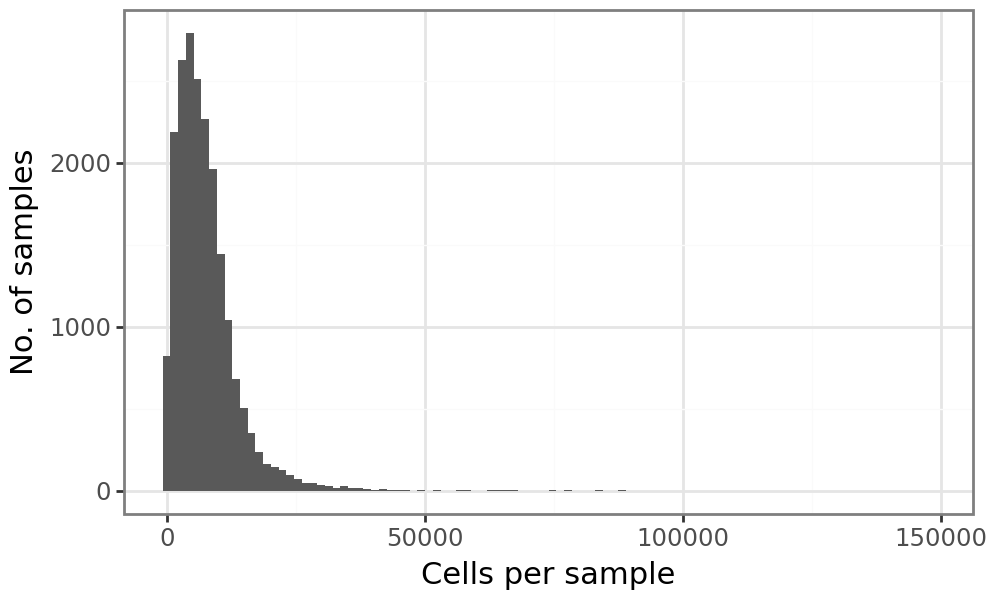

In [8]:
# plot obs per SRX
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(df["count_all"].describe())
    
p = (
    pn.ggplot(df, pn.aes(x="count_all")) + 
    pn.geom_histogram(bins=100) +
    pn.labs(x="Cells per sample", y="No. of samples") +
    pn.theme(figure_size=(5,3))
    )
p

In [9]:
# obs count per 10X Genomics technology
with tiledbsoma.Experiment.open(db_uri) as exp:
    df = (
        exp.obs.read(column_names=["tech_10x"])
        .concat()
        .group_by(["tech_10x"])
        .aggregate([
            ([], 'count_all'),
        ])
        .sort_by([("count_all", "descending")])
        .to_pandas()
    )
    
# convert "NaN" to NaN
df["tech_10x"] = df["tech_10x"].astype(str).replace("NaN", np.nan)
# sum by tech_10x
df = df.groupby("tech_10x").sum().reset_index()
df

,tech_10x,count_all
0,3_prime_gex,116641262
1,5_prime_gex,25747020
2,atac,18685
3,cellplex,291407
4,feature_barcoding,2163264
5,fixed_rna,7410
6,multiome,4844589
7,nan,684138
8,not_applicable,997406
9,other,973283


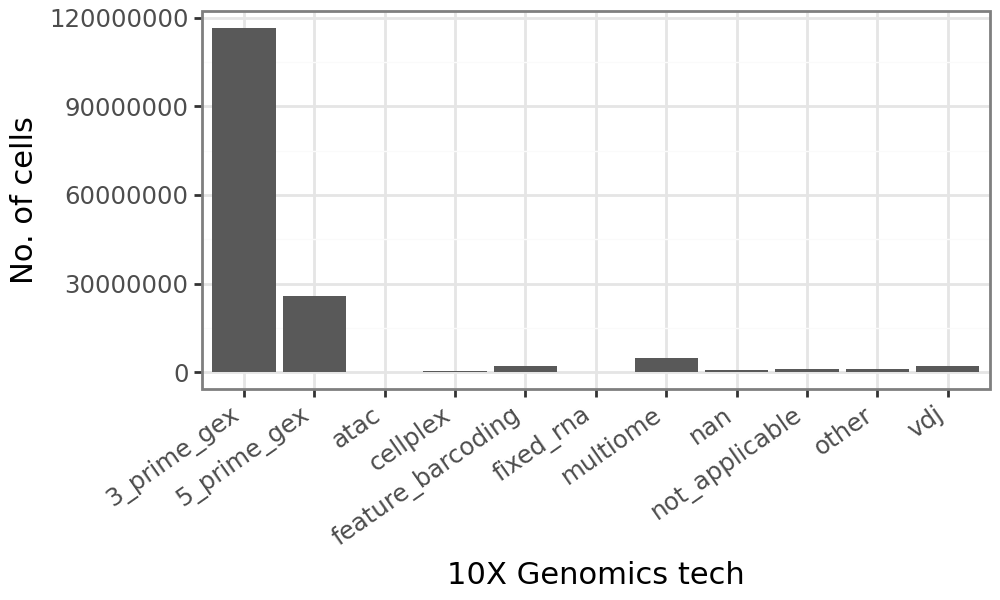

In [10]:
# plot cells per SRX and tech
p = (
    pn.ggplot(df, pn.aes(x="tech_10x", y="count_all")) + 
    pn.geom_col() +
    pn.labs(x="10X Genomics tech", y="No. of cells") +
    pn.theme(
        figure_size=(5,3),
        axis_text_x=pn.element_text(rotation=35, hjust=1)
    ))
p

In [11]:
# obs count per organism
with tiledbsoma.Experiment.open(db_uri) as exp:
    df = (
        exp.obs.read(column_names=["organism"])
        .concat()
        .group_by(["organism"])
        .aggregate([
            ([], 'count_all'),
        ])
        .sort_by([("count_all", "descending")])
        .to_pandas()
    )
df

,organism,count_all
0,human,80613090
1,mouse,69485617
2,NaN,4122955
3,NaN,684138


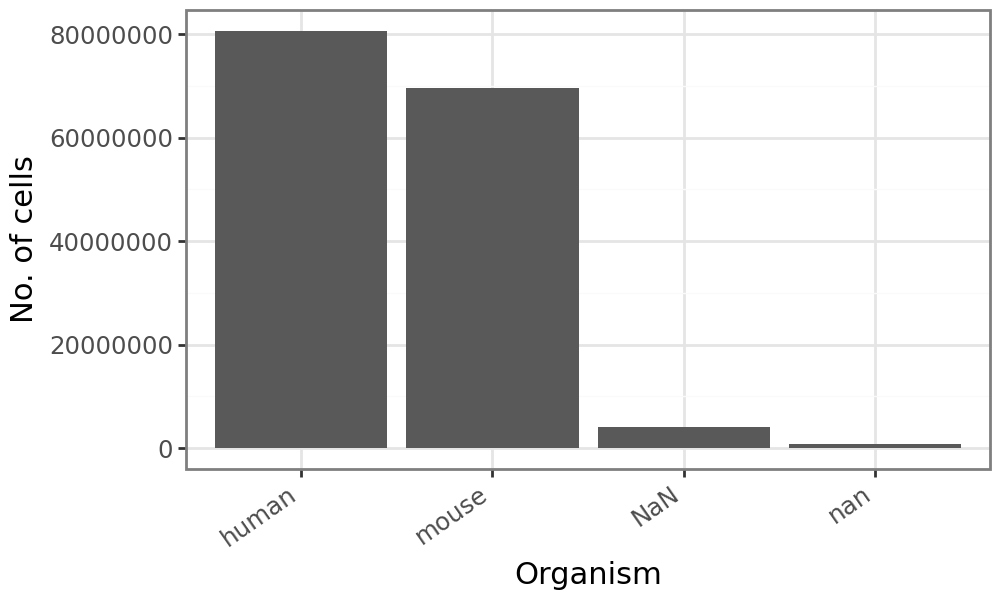

In [12]:
# plot cells per organism
p = (
    pn.ggplot(df, pn.aes(x="organism", y="count_all")) + 
    pn.geom_col() +
    pn.labs(x="Organism", y="No. of cells") +
    pn.theme(
        figure_size=(5,3),
        axis_text_x=pn.element_text(rotation=35, hjust=1)
    ))
p

#### Gene/UMI counts

In [13]:
# gene and umi counts
with tiledbsoma.Experiment.open(db_uri) as exp:
    df = (
        exp.obs.read(column_names=["SRX_accession", "gene_count", "umi_count"])
        .concat()
        .sort_by([("gene_count", "descending")])
        .to_pandas()
    )
df

,SRX_accession,gene_count,umi_count
0,SRX19235312,21828,832405.0
1,SRX19235312,21778,831563.0
2,SRX19235312,21383,594909.0
3,SRX19235312,21251,749600.0
4,SRX19235312,20817,556643.0
...,...,...,...
154905795,SRX6640153,1,1.0
154905796,SRX6640153,1,1.0
154905797,SRX6640153,1,1.0
154905798,SRX6640153,1,1.0


count   154905800
mean         2264
std          1833
min             1
25%           868
50%          1851
75%          3236
max         21828
Name: gene_count, dtype: float64


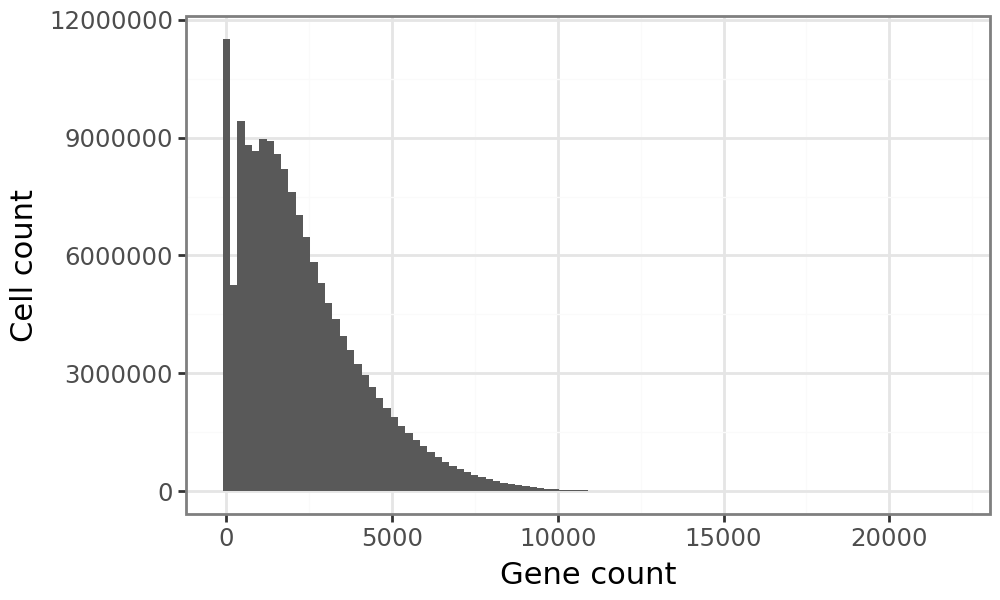

In [14]:
# plot genes per cell
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(df["gene_count"].describe())
    
p = (
    pn.ggplot(df, pn.aes(x="gene_count")) + 
    pn.geom_histogram(bins=100) +
    pn.labs(x="Gene count", y="Cell count") +
    pn.theme(figure_size=(5,3))
    )
p

count   154905800
mean         7973
std         11580
min             1
25%          1629
50%          4363
75%          9667
max       1587066
Name: umi_count, dtype: float64


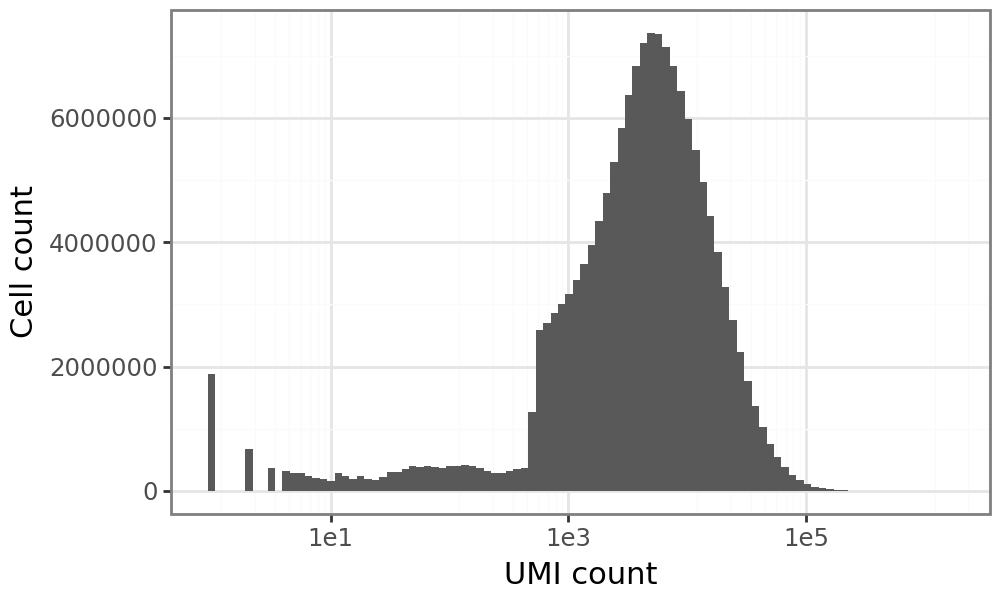

In [15]:
# plot UMIs per cell
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(df["umi_count"].describe())

p = (
    pn.ggplot(df, pn.aes(x="umi_count")) + 
    pn.geom_histogram(bins=100) +
    pn.scale_x_log10() +
    pn.labs(x="UMI count", y="Cell count") +
    pn.theme(figure_size=(5,3))
    )
p

### CZI collection datasets

In [16]:
# NOT CZI collection datasets

## create metadata query
obs_query = tiledbsoma.AxisQuery(value_filter='czi_collection_name in ["None", "NaN"]')

## run query
with tiledbsoma.Experiment.open(db_uri) as exp:
    df = (
        exp.axis_query("RNA", obs_query=obs_query)
        .obs()
        .concat()
        .group_by(["czi_collection_name"])
        .aggregate([
            ([], 'count_all'),
        ])
        .sort_by([("count_all", "descending")])
        .to_pandas()
    )
df

,czi_collection_name,count_all
0,None,150098707


In [17]:
# CZI collection datasets

## create metadata query
obs_query = tiledbsoma.AxisQuery(value_filter='czi_collection_name != "None"')

## run query
with tiledbsoma.Experiment.open(db_uri) as exp:
    df = (
        exp.axis_query("RNA", obs_query=obs_query)
        .obs()
        .concat()
        .group_by(["czi_collection_name"])
        .aggregate([
            ([], 'count_all'),
        ])
        .sort_by([("count_all", "descending")])
        .to_pandas()
    )
df

,czi_collection_name,count_all
0,Time-resolved Systems Immunology Reveals a Lat...,446821
1,Spatial proteogenomics reveals distinct and ev...,351695
2,Single-cell eQTL mapping identifies cell type ...,341516
3,Human CellCards Multi-Study CellRef 1.0 Atlas,273791
4,A molecular cell atlas of COVID-19 initiation ...,182719
...,...,...
59,Immune microniches shape intestinal Treg function,4650
60,Construction of a human cell landscape at sing...,4555
61,A single-cell atlas of the healthy breast tiss...,3912
62,Differential cell composition and split epider...,3077


In [18]:
# total obs count
df["count_all"].sum()

4293201

In [19]:
# number of SRX accessions per czi collection

## create metadata query
obs_query = tiledbsoma.AxisQuery(value_filter='czi_collection_name != "None"')

## run query
with tiledbsoma.Experiment.open(db_uri) as exp:
    df = (
        exp.axis_query("RNA", obs_query=obs_query)
        .obs()
        .concat()
        .group_by(["SRX_accession", "czi_collection_name"])
        .aggregate([])
        .group_by(["czi_collection_name"])
        .aggregate([
            ([], 'count_all'),
        ])
        .sort_by([("count_all", "descending")])
        .to_pandas()
    )
df

,czi_collection_name,count_all
0,Time-resolved Systems Immunology Reveals a Lat...,52
1,Cross-tissue immune cell analysis reveals tiss...,52
2,Spatial proteogenomics reveals distinct and ev...,46
3,Human CellCards Multi-Study CellRef 1.0 Atlas,43
4,Construction of a human cell landscape at sing...,34
...,...,...
59,A proximal-to-distal survey of healthy adult h...,1
60,Comparative Analysis of Commercial Single-Cell...,1
61,A single-cell atlas of the healthy breast tiss...,1
62,Direct Exposure to SARS-CoV-2 and Cigarette Sm...,1


In [20]:
# total SRX accession count
df["count_all"].sum()

629

## Variables

In [21]:
# get colnames
with tiledbsoma.open(db_uri) as exp:
    print(exp.ms["RNA"].var.schema)

soma_joinid: int64 not null
var_id: large_string


In [22]:
# read in var metadata
with tiledbsoma.Experiment.open(db_uri) as exp:
    df = (
        exp.ms["RNA"]
        .var.read()
        .concat()
        .to_pandas()
    )
df

,soma_joinid,var_id
0,0,ENSG00000000003
1,1,ENSG00000000005
2,2,ENSG00000000419
3,3,ENSG00000000457
4,4,ENSG00000000460
...,...,...
95411,95411,ENSMMUG00000065379
95412,95412,ENSMMUG00000065380
95413,95413,ENSMMUG00000065382
95414,95414,ENSMMUG00000065383


In [23]:
# count the number of Ensembl IDs per organism prefix
df["var_id"].replace(r"\d+$", "", regex=True).value_counts()

var_id
ENSG       36601
ENSMUSG    32285
ENSMMUG    26530
Name: count, dtype: int64

# Update database

In [26]:
# get colnames
with tiledbsoma.open(db_uri) as exp:
    print(exp.ms["RNA"].var.schema)

soma_joinid: int64 not null
var_id: large_string


In [27]:
# read in the var (gene) level metadata
with tiledbsoma.Experiment.open(db_uri) as exp:
    df = (
        exp.ms["RNA"]
        .var.read()
        .concat()
        .to_pandas()
    )
print(df.shape)
df.head()

(95416, 2)


,soma_joinid,var_id
0,0,ENSG00000000003
1,1,ENSG00000000005
2,2,ENSG00000000419
3,3,ENSG00000000457
4,4,ENSG00000000460


In [29]:
import re
def ensemble_to_org(gene_id):
    IDX = {
        "ENSG": "Homo sapiens",
        "ENSMUSG": "Mus musculus",
        "ENSMMUG": "Macaca mulatta",
    }
    prefix = re.sub(r"[0-9]+", "", gene_id)
    return IDX.get(prefix, "other")

df["organism"] = df["var_id"].apply(ensemble_to_org)
df

,soma_joinid,var_id,organism
0,0,ENSG00000000003,Homo sapiens
1,1,ENSG00000000005,Homo sapiens
2,2,ENSG00000000419,Homo sapiens
3,3,ENSG00000000457,Homo sapiens
4,4,ENSG00000000460,Homo sapiens
...,...,...,...
95411,95411,ENSMMUG00000065379,Macaca mulatta
95412,95412,ENSMMUG00000065380,Macaca mulatta
95413,95413,ENSMMUG00000065382,Macaca mulatta
95414,95414,ENSMMUG00000065383,Macaca mulatta


***

# Sandbox

In [24]:
# view all metadata
with tiledbsoma.Experiment.open(db_uri) as exp:
    df = (
        exp.obs.read()
        .concat()
        .slice(0,3) 
        .to_pandas()
    )
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(3, 15)


,soma_joinid,obs_id,gene_count,umi_count,barcode,SRX_accession,lib_prep,tech_10x,organism,tissue,disease,purturbation,cell_line,czi_collection_id,czi_collection_name
0,0,AAACCCAAGGGAGATA_SRX10681588,1677,4085.0,AAACCCAAGGGAGATA,SRX10681588,10x_Genomics,3_prime_gex,human,blood,not specified,lean,not applicable,None,None
1,1,AAACCCAAGGTTGGAC_SRX10681588,1371,3866.0,AAACCCAAGGTTGGAC,SRX10681588,10x_Genomics,3_prime_gex,human,blood,not specified,lean,not applicable,None,None
2,2,AAACCCACAGTGGTGA_SRX10681588,1891,3936.0,AAACCCACAGTGGTGA,SRX10681588,10x_Genomics,3_prime_gex,human,blood,not specified,lean,not applicable,None,None


In [ ]:
# genes per obs function
def get_genes_per_obs(db_uri, start, end):
    with tiledbsoma.Experiment.open(db_uri) as exp:
        data = (
            exp.ms["RNA"].X["data"]
            .read((slice(start, end),)).coos().concat()
        )
    return np.diff(data.to_scipy().tocsr().indptr)[start:end]

get_genes_per_obs(db_uri, 0, 10)

In [ ]:
def get_umi_counts_per_obs(db_uri, start, end):
    with tiledbsoma.Experiment.open(db_uri) as exp:
        data = exp.ms["RNA"].X["data"].read((slice(start, end),)).coos().concat()
    sp = data.to_scipy().tocsr()
    return sp.sum(axis=1).A1[start:end]

get_umi_counts_per_obs(db_uri, 0, 3)

In [52]:
# slice by metadata and return as anndata
obs_query = tiledbsoma.AxisQuery(value_filter='SRX_accession in ["SRX24651627"]')

with tiledbsoma.Experiment.open(db_uri) as exp:
    adata = exp.axis_query("RNA", obs_query=obs_query).to_anndata(X_name="data")
adata

AnnData object with n_obs × n_vars = 18041 × 68886
    obs: 'soma_joinid', 'obs_id', 'gene_count', 'umi_count', 'barcode', 'SRX_accession', 'lib_prep', 'tech_10x', 'organism', 'tissue', 'disease', 'purturbation', 'cell_line', 'czi_collection_id', 'czi_collection_name'
    var: 'soma_joinid', 'var_id', 'gene_symbols', 'feature_types'

In [56]:
with tiledbsoma.Experiment.open(db_uri) as exp:
    print(
        exp.axis_query("RNA", obs_query=obs_query)
        .obs()
        .concat()
        .to_pandas()
    )

       soma_joinid                        obs_id  gene_count  umi_count  \
0           441222  AAACCCAAGTATGTAG_SRX24651627        1727     2848.0   
1           441223  AAACCCACACATGTTG_SRX24651627        5073    17065.0   
2           441224  AAACCCACAGCGGTCT_SRX24651627        3216     7410.0   
3           441225  AAACCCAGTACTTGTG_SRX24651627        4358    14341.0   
4           441226  AAACCCAGTAGACTGG_SRX24651627        2850     6482.0   
...            ...                           ...         ...        ...   
18036       459258  TTTGTTGTCGGCATAT_SRX24651627        2689     6617.0   
18037       459259  TTTGTTGTCGGTTGTA_SRX24651627        2628     5367.0   
18038       459260  TTTGTTGTCTCTATGT_SRX24651627        4538    14614.0   
18039       459261  TTTGTTGTCTGTGCAA_SRX24651627        3512     8211.0   
18040       459262  TTTGTTGTCTTAGTTC_SRX24651627        1250     1992.0   

                barcode SRX_accession      lib_prep        tech_10x organism  \
0      AAACCCAAGTAT

In [23]:
import scanpy as sc

In [58]:
p = "/processed_datasets/scRecount/scRecounter/prod3/SCRECOUNTER_2025-01-16_14-55-07/STAR/SRX23665550/GeneFull/filtered/"
adata = sc.read_10x_mtx(p)
adata

AnnData object with n_obs × n_vars = 14844 × 32285
    var: 'gene_ids', 'feature_types'

In [60]:
# get obs_id
adata.obs.index

Index(['AAACCCAAGAATTGTG', 'AAACCCAAGCCTTTCC', 'AAACCCAAGCGTTCCG',
       'AAACCCAAGGTATAGT', 'AAACCCAAGTTTCGGT', 'AAACCCACAAAGCACG',
       'AAACCCACAAATACAG', 'AAACCCACACATATGC', 'AAACCCACACCCAAGC',
       'AAACCCACACCTATCC',
       ...
       'TTTGGTTTCTATCGTT', 'TTTGTTGAGCCTGGAA', 'TTTGTTGAGGAGGGTG',
       'TTTGTTGAGGGCTGAT', 'TTTGTTGAGTATGAAC', 'TTTGTTGCAACCCTCT',
       'TTTGTTGCACATAGCT', 'TTTGTTGCACGTTCGG', 'TTTGTTGCACTCCCTA',
       'TTTGTTGGTCTACATG'],
      dtype='object', length=14844)

In [28]:
#(adata.X > 0).sum(axis=1).A1
adata.X.sum(axis=1).A1

array([ 8611.,  2874.,  4688., ..., 14166.,  6238.,  5111.], dtype=float32)

In [31]:
(adata.X > 0).shape

(14844, 32285)